In [22]:
# !git clone git@github.com:RockDeng110/Predictive-Maintenance-for-Hydraulic-Systems.git
!git clone https://github.com/RockDeng110/Predictive-Maintenance-for-Hydraulic-Systems.git
%cd Predictive-Maintenance-for-Hydraulic-Systems/data
!ls

Cloning into 'Predictive-Maintenance-for-Hydraulic-Systems'...
remote: Enumerating objects: 40, done.
remote: Total 40 (delta 0), reused 0 (delta 0), pack-reused 40 (from 1)
Receiving objects: 100% (40/40), 88.74 MiB | 13.69 MiB/s, done.
Resolving deltas: 100% (2/2), done.
Updating files: 100% (26/26), done.
/content/Predictive-Maintenance-for-Hydraulic-Systems/Predictive-Maintenance-for-Hydraulic-Systems/Predictive-Maintenance-for-Hydraulic-Systems/data
condition+monitoring+of+hydraulic+systems


In [24]:

%cd condition+monitoring+of+hydraulic+systems
!ls

/content/Predictive-Maintenance-for-Hydraulic-Systems/Predictive-Maintenance-for-Hydraulic-Systems/Predictive-Maintenance-for-Hydraulic-Systems/data/condition+monitoring+of+hydraulic+systems
CE.txt		 documentation.txt  FS2.txt	 PS2.txt  PS5.txt  TS1.txt  TS4.txt
CP.txt		 EPS1.txt	    profile.txt  PS3.txt  PS6.txt  TS2.txt  VS1.txt
description.txt  FS1.txt	    PS1.txt	 PS4.txt  SE.txt   TS3.txt


# Predictive Maintenance for Hydraulic Systems

## Data importing and basic understanding
The "Condition Monitoring of Hydraulic Systems" dataset provides comprehensive sensor data from a hydraulic test rig, facilitating the analysis and assessment of various component conditions. This dataset is particularly valuable for tasks such as fault detection, predictive maintenance, and machine learning model development.

**Dataset Overview:**

- **Source:** The dataset is available through the UCI Machine Learning Repository. citeturn0search0

- **Structure:** It comprises multivariate time-series data with 2,205 instances (cycles) and 43,680 features. Each cycle corresponds to a 60-second load sequence, during which various sensor measurements are recorded.

**Key Components Monitored:**

1. **Cooler:** Monitored for efficiency, with conditions ranging from full efficiency (100%) to near-total failure (3%).

2. **Valve:** Assessed based on switching behavior, with conditions from optimal (100%) to severe lag (73%).

3. **Pump:** Evaluated for internal leakage, categorized as no leakage (0), weak leakage (1), or severe leakage (2).

4. **Accumulator:** Monitored for pressure levels, from optimal (130 bar) to critically low pressure (90 bar).

**Sensors and Measurements:**

The dataset includes readings from multiple sensors, each capturing specific physical quantities at designated sampling rates:

- **Pressure Sensors (PS1 to PS6):** Measure pressure in bar at 100 Hz.

- **Motor Power Sensor (EPS1):** Records motor power in watts at 100 Hz.

- **Flow Sensors (FS1, FS2):** Capture volume flow in liters per minute at 10 Hz.

- **Temperature Sensors (TS1 to TS4):** Record temperature in degrees Celsius at 1 Hz.

- **Vibration Sensor (VS1):** Measures vibration in mm/s at 1 Hz.

- **Virtual Sensors:** Calculate cooling efficiency (%), cooling power (kW), and efficiency factor (%) at 1 Hz.

**Data Organization:**

- **Sensor Data Files:** Each sensor's readings are stored in separate tab-delimited text files, where rows represent cycles and columns denote data points within each cycle.

- **Profile File:** The 'profile.txt' file contains cycle-wise annotations of component conditions, facilitating supervised learning and condition assessment tasks.

**Applications:**

Researchers and practitioners can utilize this dataset to:

- **Develop Predictive Models:** Create models to predict component failures or maintenance needs based on sensor data.

- **Perform Fault Diagnosis:** Identify and classify different fault types and their severity levels.

- **Analyze Sensor Data:** Explore relationships between sensor measurements and component conditions to enhance system monitoring.

For practical applications and modeling examples using this dataset, refer to the GitHub repository that demonstrates condition monitoring using XGBoost.

By leveraging this dataset, you can gain insights into the operational health of hydraulic systems and develop robust models for predictive maintenance and fault detection.

**Load Load Necessary Libraries**

In [26]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier





**Load Dataset**

****

In [28]:

# Load profile data (target labels)
profile_path = "./profile.txt"  # Update path if necessary
profile_df = pd.read_csv(profile_path, sep="\t", header=None)
profile_df.columns = ["Cooler_Condition", "Valve_Condition", "Pump_Leakage", "Accumulator_Pressure", "Unknown_Flag"]

# List of sensor files
sensor_files = ["EPS1.txt", "FS1.txt", "FS2.txt", "PS1.txt", "PS2.txt", "PS3.txt", "PS4.txt", "PS5.txt", "PS6.txt", "TS1.txt", "TS2.txt", "TS3.txt", "TS4.txt", "VS1.txt"]

# Extract features from sensor data
feature_dict = {}
for sensor_file in sensor_files:
    sensor_df = pd.read_csv(f"./{sensor_file}", sep="\t", header=None)
    feature_dict[f"{sensor_file}_mean"] = sensor_df.mean(axis=1)
    feature_dict[f"{sensor_file}_std"] = sensor_df.std(axis=1)
    feature_dict[f"{sensor_file}_min"] = sensor_df.min(axis=1)
    feature_dict[f"{sensor_file}_max"] = sensor_df.max(axis=1)
    feature_dict[f"{sensor_file}_range"] = feature_dict[f"{sensor_file}_max"] - feature_dict[f"{sensor_file}_min"]

# Convert extracted features into a DataFrame
features_df = pd.DataFrame(feature_dict)

# Merge features with profile data
data = pd.concat([features_df, profile_df], axis=1)

# Define features and target
X = data.drop(columns=["Cooler_Condition", "Valve_Condition", "Pump_Leakage", "Accumulator_Pressure", "Unknown_Flag"])
y = data["Pump_Leakage"]  # Example: Predicting pump leakage




In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Train an XGBoost Classifier
xgb_model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

Random Forest Accuracy: 0.9977324263038548
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       0.99      1.00      1.00       101
           2       1.00      0.99      1.00       112

    accuracy                           1.00       441
   macro avg       1.00      1.00      1.00       441
weighted avg       1.00      1.00      1.00       441



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:31:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9909297052154195
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       228
           1       0.99      0.99      0.99       101
           2       0.99      0.97      0.98       112

    accuracy                           0.99       441
   macro avg       0.99      0.99      0.99       441
weighted avg       0.99      0.99      0.99       441



## Data preprocessing

In [19]:
## Step 3: Merge All Sensor Data into a Single DataFrame
merged_df = pd.concat(data_files.values(), axis=1)
merged_df.dropna(axis=1, how="all", inplace=True)  # Remove empty columns

# Display dataset structure
print("Merged Dataset Shape:", merged_df.shape)
print(merged_df.info())



Merged Dataset Shape: (2204, 43680)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Columns: 43680 entries, 68.039 to 0.543
dtypes: float64(43646), int64(34)
memory usage: 734.5 MB
None


Missing Values:
68.039     0
0          0
0.1        0
0.2        0
0.3        0
          ..
0.539      0
0.544.1    0
0.545.1    0
0.535      0
0.543      0
Length: 43680, dtype: int64


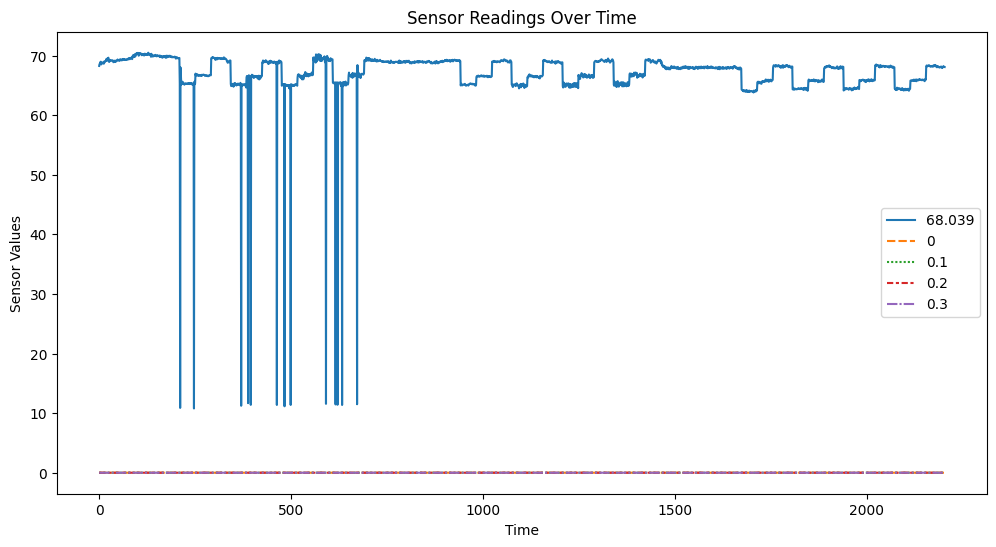

In [20]:
## Step 4: Exploratory Data Analysis (EDA)
# Check for missing values
print("Missing Values:")
print(merged_df.isnull().sum())

# Plot sensor trends over time
plt.figure(figsize=(12,6))
sns.lineplot(data=merged_df.iloc[:, :5])  # Plot first few sensor readings
plt.title("Sensor Readings Over Time")
plt.xlabel("Time")
plt.ylabel("Sensor Values")
plt.show()



In [21]:
## Step 5: Data Preprocessing
# Define Features and Target Variable
X = merged_df.iloc[:, :-1]  # Features (all sensor readings)
y = merged_df.iloc[:, -1]   # Target (assumed last column is the label)

# Handle missing values by filling with mean
X.fillna(X.mean(), inplace=True)

# Normalize sensor data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



KeyboardInterrupt: 

In [ ]:
## Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)



In [ ]:
## Step 7: Train Baseline Model (Random Forest)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)



In [ ]:
## Step 8: Evaluate Model Performance
y_pred = clf.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



In [ ]:
## Step 9: Save Processed Data for Further Use
merged_df.to_csv("processed_hydraulic_systems_data.csv", index=False)